In [20]:
%matplotlib inline

In [21]:
from scipy import stats
import numpy as np
import pandas as pd

import requests
import datetime 
from pandas.tseries.offsets import *

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import csv

In [22]:
sid_1 = '^TWII'
start = datetime.date(2018,1,1)
end = datetime.date(2020,1,1)

#導入pandas_datareader
from pandas_datareader import data
# 與yahoo請求，套件路徑因版本不同
pd.core.common.is_list_like = pd.api.types.is_list_like

stock_taiex_origin = data.get_data_yahoo(sid_1, start, end)
start

datetime.date(2018, 1, 1)

In [23]:
stock_taiex = stock_taiex_origin['Adj Close'] / stock_taiex_origin['Adj Close'].shift(1) - 1
stock_taiex.dropna(inplace=True)
stock_taiex = stock_taiex.to_frame()
stock_taiex.columns = ['ret']

In [24]:
sid_2 = '2330.TW'
stock_2330_origin = data.get_data_yahoo(sid_2, start, end)
stock_2330 = stock_2330_origin['Adj Close'] / stock_2330_origin['Adj Close'].shift(1) - 1
stock_2330.dropna(inplace=True)
stock_2330 = stock_2330.to_frame()
stock_2330.columns = ['ret']
stock_2330.head(5)

,ret
Date,
2018-01-03,0.019355
2018-01-04,0.010548
2018-01-05,0.002088
2018-01-08,0.008333
2018-01-09,0.000000


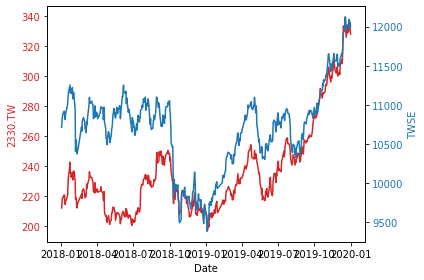

In [25]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel(sid_2, color=color)
ax1.plot(stock_2330_origin.index, stock_2330_origin['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('TWSE', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_taiex_origin.index, stock_taiex_origin['Adj Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.rcParams["figure.figsize"] = [16,9]

# 名字有誤
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

 ## 個股&大盤股價 
 

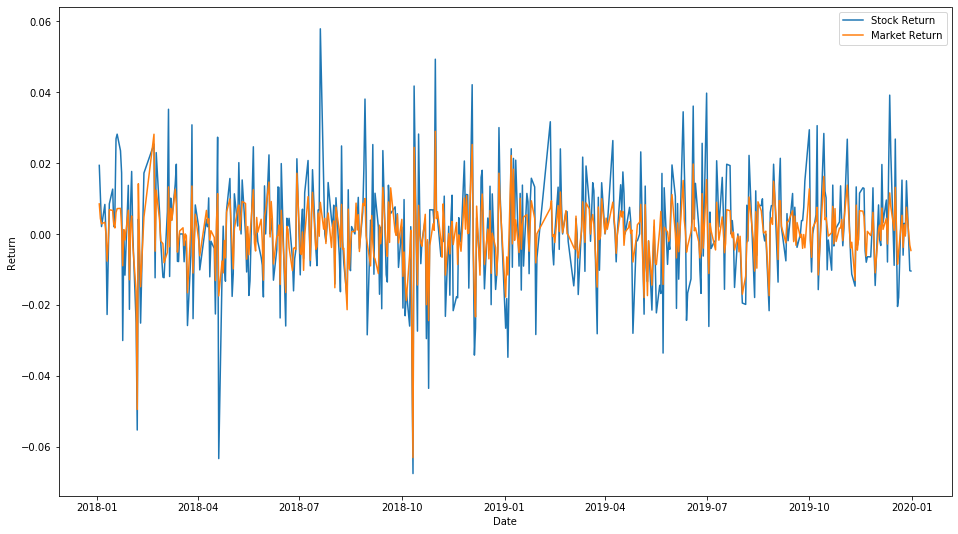

In [26]:
fig, ax = plt.subplots()

color = 'tab:red'
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.plot(stock_2330.index, stock_2330['ret'] ,label='Stock Return')
ax.plot(stock_taiex.index, stock_taiex['ret'], label='Market Return')
ax.legend()
plt.show()

## 個股 & 大盤 日報酬率

In [27]:
np.polyfit(stock_taiex['ret'],stock_2330['ret'],deg=1)

array([1.52048300e+00, 6.08143183e-04])

In [28]:
results = stats.linregress(stock_taiex['ret'], stock_2330['ret'])
results

LinregressResult(slope=1.5204829989861466, intercept=0.0006081431830312574, rvalue=0.837467708578164, pvalue=7.715817282878694e-129, stderr=0.045146035600048345)

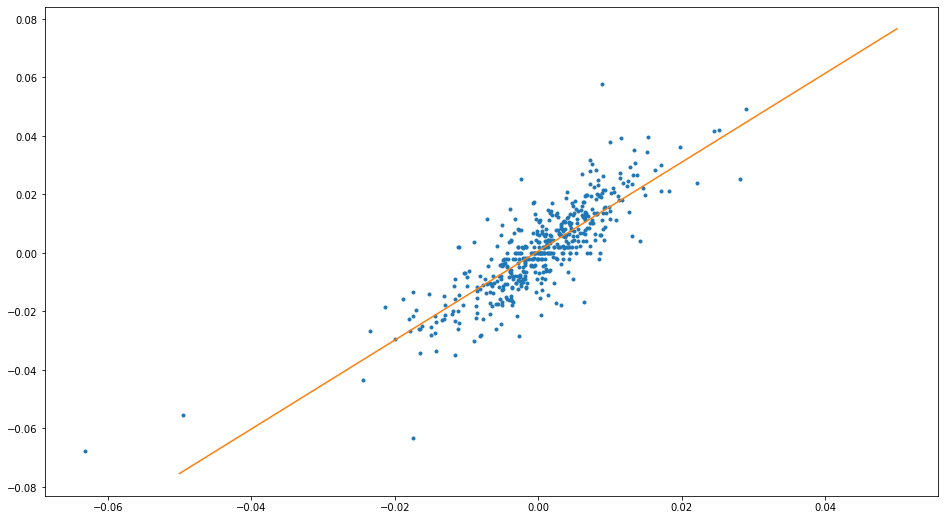

In [29]:
plt.plot(stock_taiex['ret'], stock_2330['ret'], '.')
x = np.linspace(-0.05, 0.05, 100)
y = results.slope * x + results.intercept
plt.plot(x, y)
plt.show()

In [30]:
x = sm.add_constant(stock_taiex['ret'])
ols_results = sm.OLS(stock_2330['ret'], x).fit()
print(ols_results.summary())
#print(ols_results.params.ret)
#print(ols_results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1134.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):          7.72e-129
Time:                        15:57:18   Log-Likelihood:                 1630.6
No. Observations:                 485   AIC:                            -3257.
Df Residuals:                     483   BIC:                            -3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.593      0.1

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
index = {"祥碩":"5269.TW","台G電": "2330.TW", "瑞昱":"2379.TW", "聯發科":"2454.TW", "群光":"2385.TW","敦陽科":"2480.TW","元大0050": "0050.TW", "元大0056":"0056.TW", "國光生":"4142.TW"}
for key,value in index.items():
    origin = data.get_data_yahoo(value, start, end)
    temp = origin['Adj Close'] / origin['Adj Close'].shift(1) - 1
    temp.dropna(inplace=True)
    temp = temp.to_frame()
    temp.columns = ['ret']
    
    x = sm.add_constant(stock_taiex['ret'])
    ols_results = sm.OLS(temp['ret'], x).fit()
    print("代號：", key)
    print("α: ", round(ols_results.params.const, 5))
    print("β: ", round(ols_results.params.ret, 3))
   # print("Adj R-squared: ", round(ols_results.rsquared_adj, 3))
    print("---")

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


代號： 祥碩
α:  0.00153
β:  1.246
---


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


代號： 台G電
α:  0.00061
β:  1.52
---


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


代號： 瑞昱
α:  0.00165
β:  1.279
---


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


代號： 聯發科
α:  0.00085
β:  1.338
---


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


代號： 群光
α:  0.00051
β:  0.604
---


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


代號： 敦陽科
α:  0.00105
β:  0.506
---


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


代號： 元大0050
α:  0.00024
β:  1.047
---


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


代號： 元大0056
α:  0.00039
β:  0.664
---
代號： 國光生
α:  0.00068
β:  0.493
---


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
